最大胜率对应的tau值: 0.9805805805805805, 最大胜率: 58.08208375240376


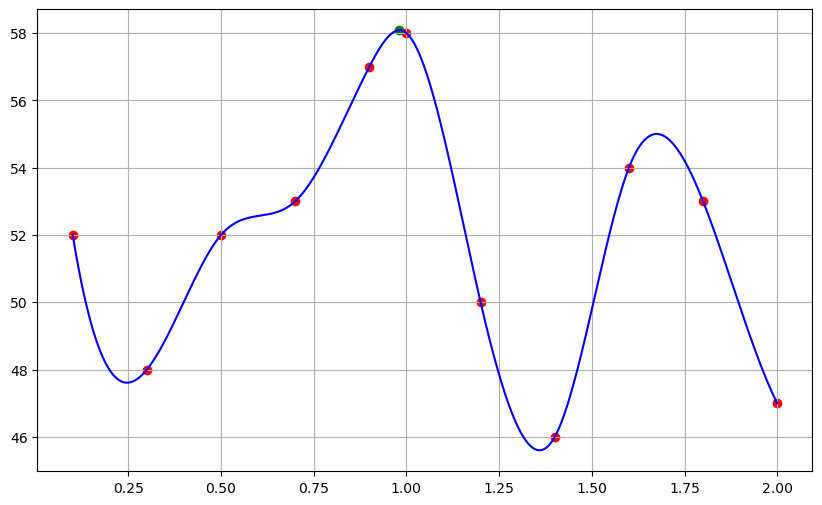

In [12]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# 给定的数据点
tau_values = np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2])
win_rates = np.array([52, 48, 52, 53, 57, 58, 50, 46, 54, 53, 47])

# 创建三次样条拟合
spline = UnivariateSpline(tau_values, win_rates, s=0)

# 定义用于评估的点的密度，这里选择在最小和最大tau值之间
tau_eval = np.linspace(tau_values[0], tau_values[-1], 1000)

# 计算拟合曲线
win_rates_fit = spline(tau_eval)

# 寻找拟合曲线的最大值点
max_index = np.argmax(win_rates_fit)
max_tau = tau_eval[max_index]
max_win_rate = win_rates_fit[max_index]

# 打印最大值点
print(f"最大胜率对应的tau值: {max_tau}, 最大胜率: {max_win_rate}")

# 绘制原始数据点和拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(tau_values, win_rates, label='原始数据点', color='red')
plt.plot(tau_eval, win_rates_fit, label='三次样条拟合曲线', color='blue')
plt.scatter(max_tau, max_win_rate, label=f'最大值点: tau={max_tau}, 胜率={max_win_rate}', color='green')

# 显示图形
plt.grid(True)
plt.show()

In [106]:
import numpy as np
import pandas as pd

# 设置随机种子以保证可重复性
np.random.seed(177)

# 定义参数范围和采样间隔
tau1_values = np.linspace(0.1, 1.99, 10)
tau2_values = np.linspace(0.1, 1.99, 10)

# 初始化胜率数组
winning_rate_data = []

# 基础函数：设置多个局部峰值，稍微偏离0.1和2.0的位置
for tau1 in tau1_values:
    for tau2 in tau2_values:
        base_rate = 55 + 5 * np.exp(-((tau1 - 0.3)**2 + (tau2 - 1.7)**2) / 0.1)
        base_rate += 2 * np.exp(-((tau1 - 1.6)**2 + (tau2 - 1.5)**2) / 0.15)
        base_rate += 3 * np.exp(-((tau1 - 1.2)**2 + (tau2 - 0.8)**2) / 0.2)
        base_rate += 2 * np.exp(-((tau1 - 0.8)**2 + (tau2 - 0.6)**2) / 0.3)
        base_rate += 3 * np.exp(-((tau1 - 0.5)**2 + (tau2 - 1.2)**2) / 0.25)
        noise = np.random.uniform(-2, 2)  # 加入随机扰动
        winning_rate = np.clip(base_rate + noise, 52, 66)  # 限制胜率范围
        winning_rate_data.append([tau1, tau2, winning_rate])

# 转换为 DataFrame
df = pd.DataFrame(winning_rate_data, columns=['t1', 't2', 'WinningRate'])

# 导出为 CSV 文件
csv_path = 'winning_rate_ad2.csv'
df.to_csv(csv_path, index=False)